# **Customer Churn  Prediction Analysis Using Machine Learning**
---

In [3]:
#Import the Libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
#Load the Dataset

from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [5]:
# Creating Data Frame

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


# Analyzing the Data
---

In [6]:
#Number of columns and rows

df.shape

(7043, 21)

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#Check for NA Values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#Churn Count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

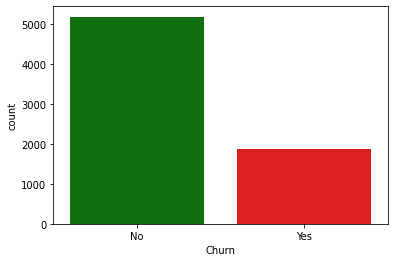

In [11]:
# Visualizing Data
sns.countplot(data=df,x='Churn',palette=['green','red'] )

In [12]:
retained  = df[df.Churn == 'No'].shape[0]
churned = df[df.Churn == 'Yes'].shape[0]
print(retained / (retained + churned)* 100,'% of customers stayed with the company')
print(churned / (retained + churned)* 100,'% of customers left with the company')

73.4630129206304 % of customers stayed with the company
26.536987079369588 % of customers left with the company


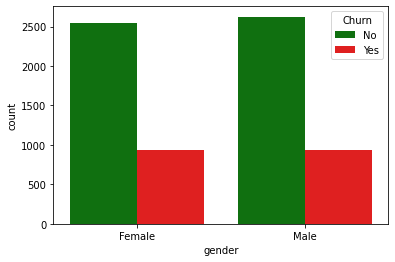

In [14]:
# Visualizing Churn data based on gender
sns.countplot(data=df, x='gender', hue='Churn', palette=['green','red'])

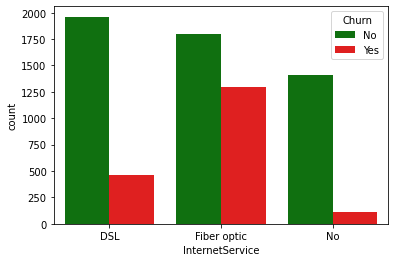

In [15]:
# Visualizing Churn data based on Internet Service
sns.countplot(data=df, x='InternetService', hue='Churn', palette=['green','red'])

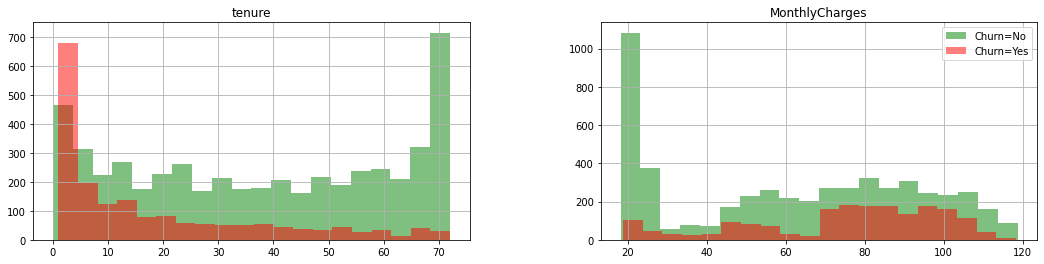

In [26]:
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(18,4))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='green', alpha=0.5, ax=ax, label='Churn=No')
plt.legend()
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='red', alpha=0.5, ax=ax, label='Churn=Yes')
plt.legend()

# Data Preprocessing
---

In [27]:
# Remove Unnecessary Columns
new_df = df.drop('customerID', axis=1)

In [28]:
# Updated Rows and cols
new_df.shape

(7043, 20)

In [ ]:
#Convert Non-numeric data to numeric
for column in new_df.columns:
  if new_df[column].dtype == np.number:
    continue
  new_df[column] = LabelEncoder().fit_transform(new_df[column])

In [30]:
#Converted data types
new_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [31]:
#Show new data frame
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [32]:
#Scaling the Data
x = new_df.drop('Churn',axis = 1)
y = new_df['Churn']

x = StandardScaler().fit_transform(x)

In [34]:
#Spliting data into 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating the Model
---

In [35]:
#Creating and Training
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#creating predictions on test data
predictions = model.predict(x_test)

print(predictions)

[1 0 0 ... 0 0 0]


In [38]:
#Check Precision, Recall, f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

